In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [378]:
df_bikes = pd.read_csv('original.csv')
df_bikes_prep = df_bikes.copy()
df_bikes_prep.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [379]:
df_bikes_prep.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [380]:
df_bikes_prep = df_bikes_prep.drop(['index','date','casual','registered'],axis=1)
df_bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [381]:
df_bikes_prep.isnull().mean()

season        0.0
year          0.0
month         0.0
hour          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
demand        0.0
dtype: float64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


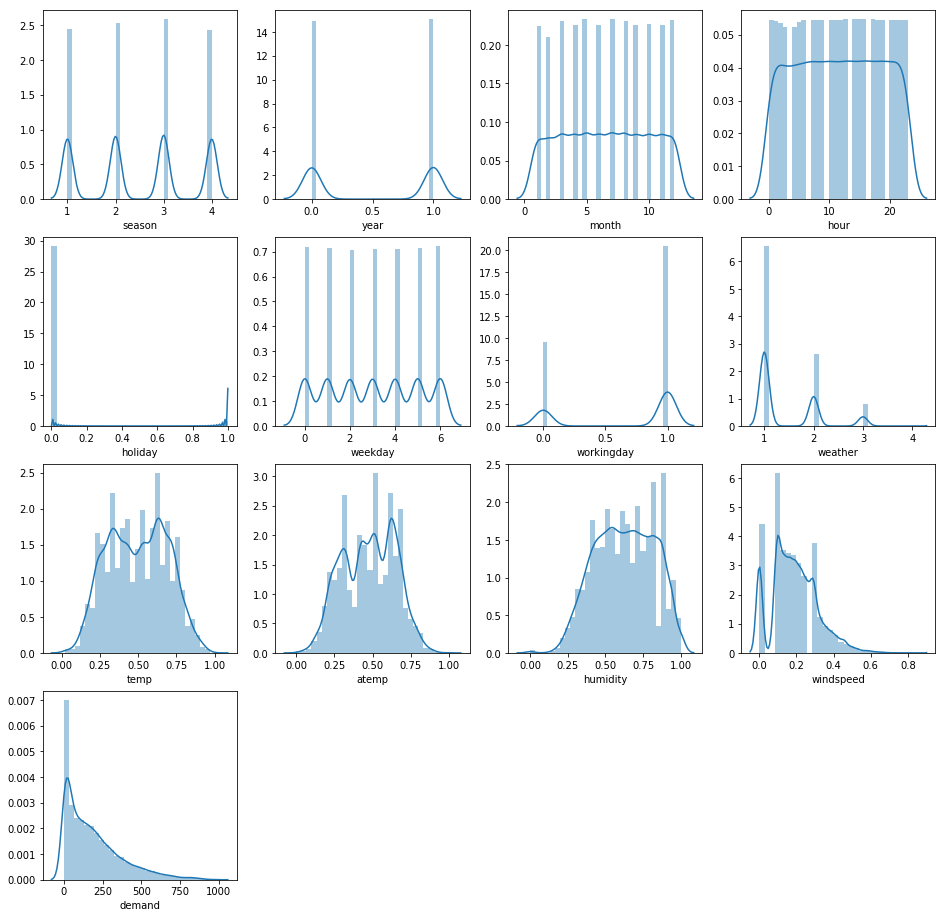

In [382]:
plt.figure(figsize=(16, 16))
for i,k in enumerate(list(df_bikes_prep.columns)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df_bikes_prep[k], bins=30)


- Demand is not distrubuted Normally

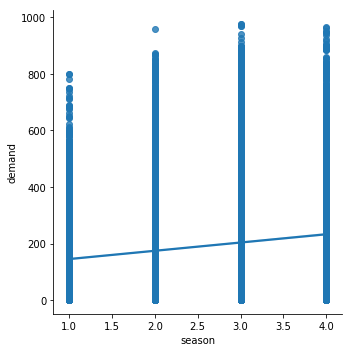

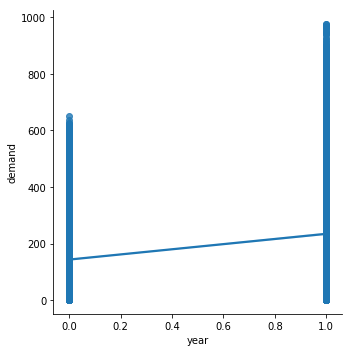

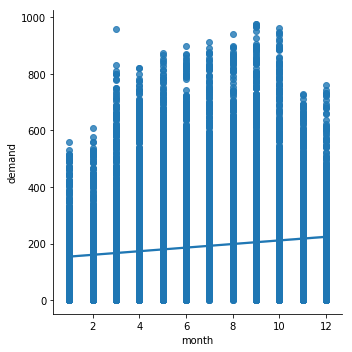

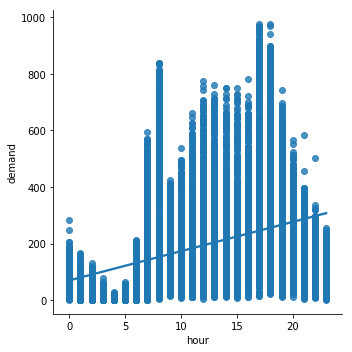

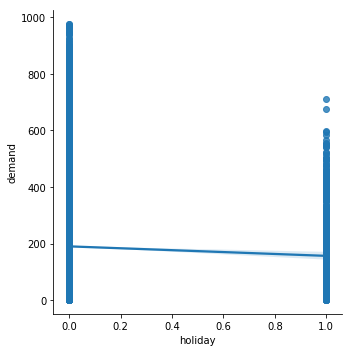

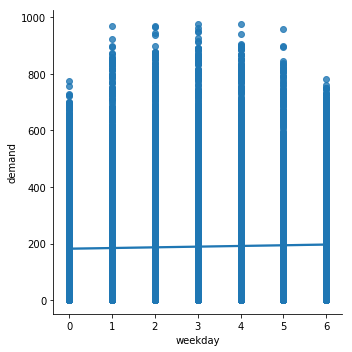

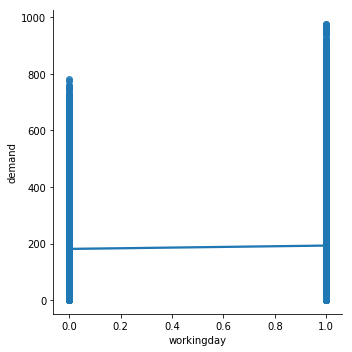

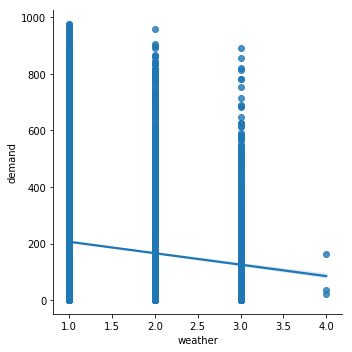

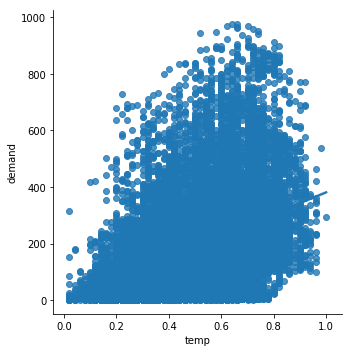

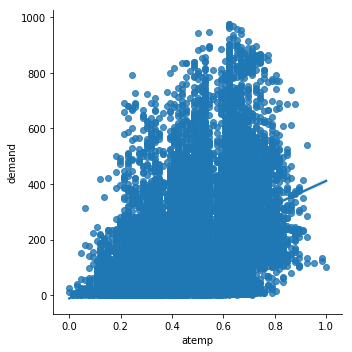

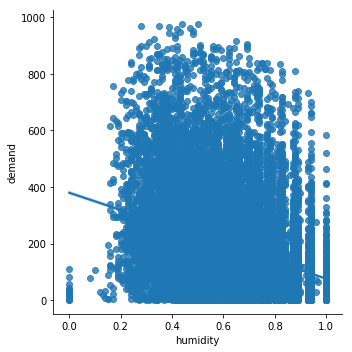

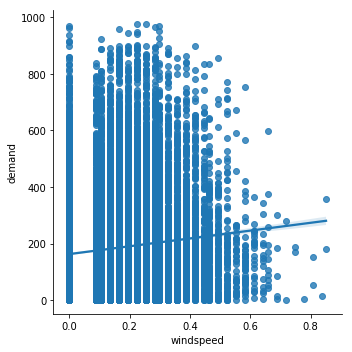

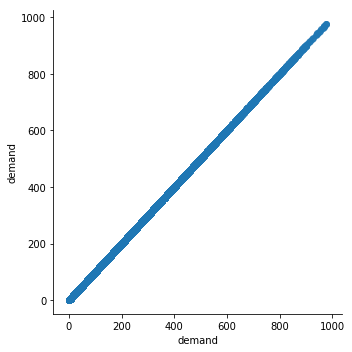

In [383]:
for i,k in enumerate(list(df_bikes_prep.columns)):
    sns.lmplot(x = k, y = 'demand', data = df_bikes_prep, order=1)



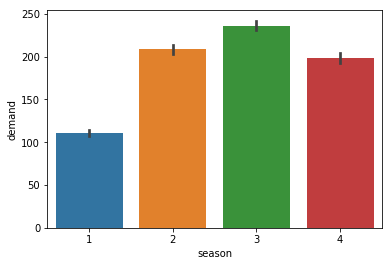

In [384]:
sns.barplot(x = 'season', y = 'demand', data = df_bikes_prep)

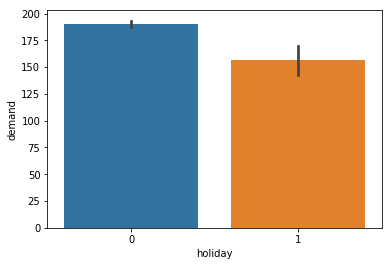

In [385]:
sns.barplot(x = 'holiday', y = 'demand', data = df_bikes_prep)

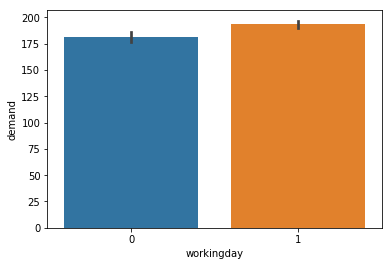

In [386]:
sns.barplot(x = 'workingday', y = 'demand', data = df_bikes_prep)

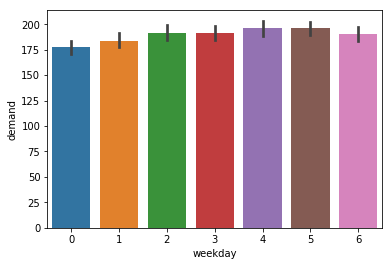

In [387]:
sns.barplot(x = 'weekday', y = 'demand', data = df_bikes_prep)

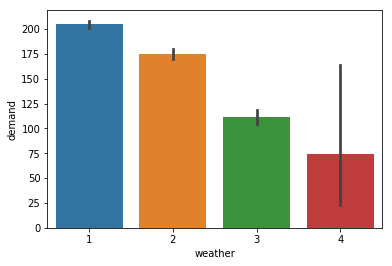

In [388]:
sns.barplot(x = 'weather', y = 'demand', data = df_bikes_prep)

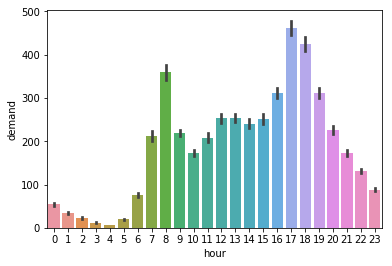

In [389]:
sns.barplot(x = 'hour', y = 'demand', data = df_bikes_prep)

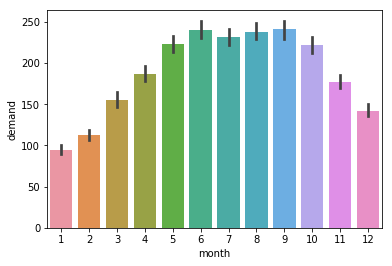

In [390]:
sns.barplot(x = 'month', y = 'demand', data = df_bikes_prep)

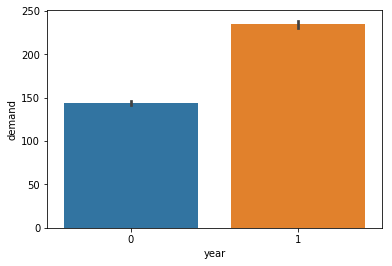

In [391]:
sns.barplot(x = 'year', y = 'demand', data = df_bikes_prep)

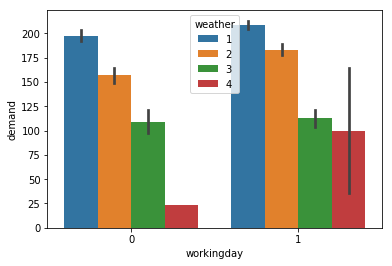

In [392]:
sns.barplot(x = 'workingday', y = 'demand', data = df_bikes_prep, hue='weather')

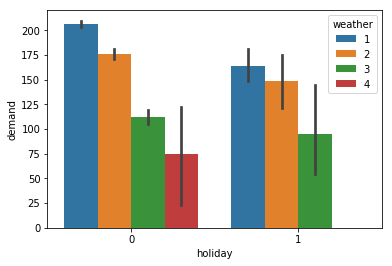

In [393]:
sns.barplot(x = 'holiday', y = 'demand', data = df_bikes_prep, hue='weather')

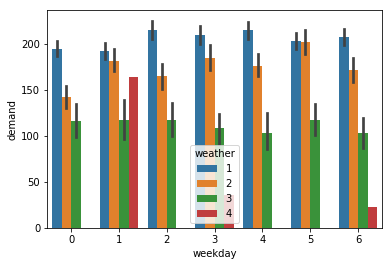

In [394]:
sns.barplot(x = 'weekday', y = 'demand', data = df_bikes_prep, hue='weather')

In [395]:
df_bikes_prep[['weekday','weather']].groupby('weather').count()

,weekday
weather,
1,11413
2,4544
3,1419
4,3


In [396]:
df_bikes_prep[['weekday','weather','demand']].groupby(['weekday','weather']).count()

demand
weekday weather        
0       1          1765
        2           568
        3           169
1       1          1582
        2           726
        3           170
        4             1
2       1          1522
        2           694
        3           237
3       1          1568
        2           613
        3           293
        4             1
4       1          1656
        2           636
        3           179
5       1          1645
        2           659
        3           183
6       1          1675
        2           648
        3           188
        4             1

In [397]:
df_bikes_prep[['holiday','weather','demand']].groupby(['holiday','weather']).count()

demand
holiday weather        
0       1         11072
        2          4407
        3          1397
        4             3
1       1           341
        2           137
        3            22

In [398]:
df_bikes_prep[['holiday','weather','demand']].groupby(['holiday','weather']).mean()

demand
holiday weather            
0       1        206.126084
        2        175.979124
        3        111.848962
        4         74.333333
1       1        164.061584
        2        148.992701
        3         94.454545

In [399]:
df_bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [400]:
df_bikes_prep['demand'].quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95])

0.05      5.0
0.10      9.0
0.25     40.0
0.50    142.0
0.75    281.0
0.90    451.2
0.95    563.1
Name: demand, dtype: float64

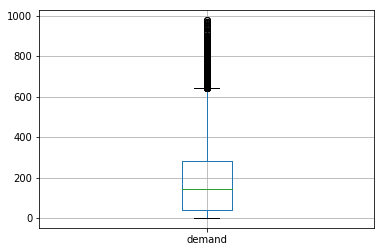

In [401]:
df_bikes_prep[['demand']].boxplot()

In [402]:
df_bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


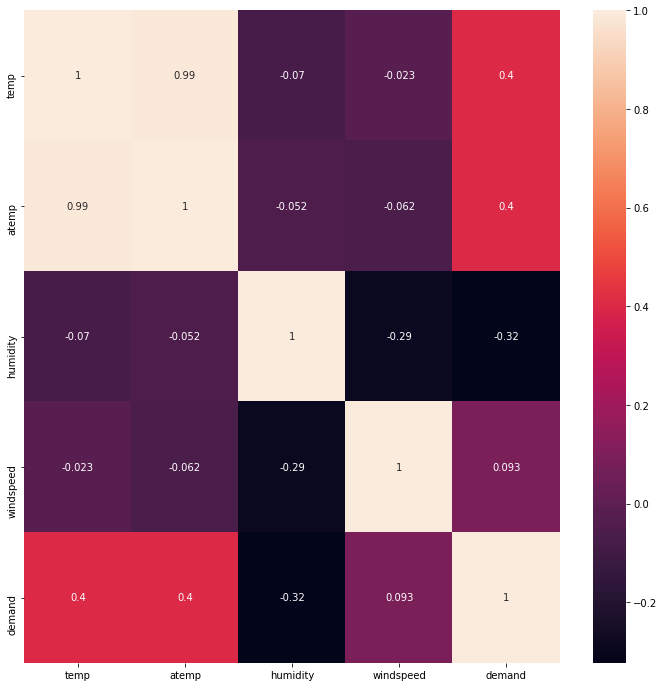

In [403]:
figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=df_bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr(), annot=True)

In [404]:
df_bikes_prep.drop(['year','workingday','weekday','atemp','windspeed'],axis=1,inplace = True)

In [405]:
df_bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [406]:
df_bikes_prep['demand'] = df_bikes_prep['demand'].astype(float)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.49622782, 0.49404034, 0.46795911, 0.47732017, 0.52675743,
        0.59145716, 0.65201544, 0.71519514, 0.80590981, 0.92530928,
        1.        , 0.92530928, 0.80590981, 0.71519514, 0.65201544,
        0.59145716, 0.52675743, 0.47732017, 0.46795911, 0.49404034,
        0.49622782]),
 <matplotlib.lines.Line2D at 0x1a2c0014a8>)

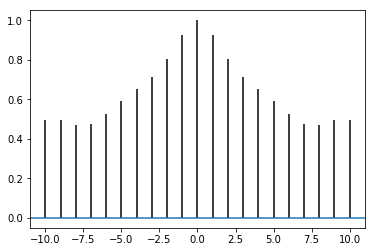

In [407]:
plt.acorr(df_bikes_prep['demand'])

In [408]:
df_bikes_prep['demand'] = np.log(df_bikes_prep['demand'])
for i in range(1,4):
    exec("df_bikes_prep['demand_t-"+str(i)+"'] = df_bikes_prep['demand'].shift(+"+str(i)+")")
df_bikes_prep.dropna(inplace=True)
df_bikes_prep.head(10)

,season,month,hour,holiday,weather,temp,humidity,demand,demand_t-1,demand_t-2,demand_t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
8,1,1,8,0,1,0.24,0.75,2.079442,1.098612,0.693147,0.000000
9,1,1,9,0,1,0.32,0.76,2.639057,2.079442,1.098612,0.693147
10,1,1,10,0,1,0.38,0.76,3.583519,2.639057,2.079442,1.098612
11,1,1,11,0,1,0.36,0.81,4.025352,3.583519,2.639057,2.079442
12,1,1,12,0,1,0.42,0.77,4.430817,4.025352,3.583519,2.639057


In [409]:
df_bikes_prep.dtypes

season          int64
month           int64
hour            int64
holiday         int64
weather         int64
temp          float64
humidity      float64
demand        float64
demand_t-1    float64
demand_t-2    float64
demand_t-3    float64
dtype: object

In [410]:
df_bikes_prep[['season','month','hour','weather','holiday']] = df_bikes_prep[['season','month','hour','weather','holiday']]\
                                                                                            .astype('category')

In [411]:
df_bikes_prep.dtypes

season        category
month         category
hour          category
holiday       category
weather       category
temp           float64
humidity       float64
demand         float64
demand_t-1     float64
demand_t-2     float64
demand_t-3     float64
dtype: object

In [412]:
df_bikes_prep = pd.get_dummies(df_bikes_prep, drop_first=True)
df_bikes_prep.head()

,temp,humidity,demand,demand_t-1,demand_t-2,demand_t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [425]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=42)

test_size = int(df_bikes_prep.shape[0] * 0.7)

Y = df_bikes_prep[['demand']]
X = df_bikes_prep.drop(['demand'], axis=1)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

y_train = Y.values[0 : tr_size]
y_test = Y.values[tr_size : len(Y)]


In [426]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

r2_train = lin_reg.score(X_train, y_train)
r2_test = lin_reg.score(X_test, y_test)

y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2_train:' +str(r2_train))
print('r2_test:' +str(r2_test))
print('rmse:' +str(rmse))

r2_train:0.9195240591465778
r2_test:0.9287151360253386
rmse:0.3809880049817044


In [427]:
np.sqrt(np.sum((np.log(np.exp(y_pred)+1) - np.log(np.exp(y_test)+1))**2)/len(X_test)) 

0.3560941706980208